# WiFi QR Code Generator for M5Stack ATOM

This notebook generates a QR code that:
1. **Automatically connects** your phone to the M5Stack WiFi AP
2. **Opens the web interface** at http://192.168.4.1

## Installation
Run this first if you don't have the required packages:
```bash
pip install qrcode[pil]
```

In [1]:
import qrcode
from PIL import Image, ImageDraw, ImageFont
import os

## Configuration

These values match your M5Stack ATOM WiFi AP settings:

In [2]:
# WiFi AP credentials from your Arduino code
WIFI_SSID = "M5Stack_Ap"
WIFI_PASSWORD = "66666666"
WIFI_SECURITY = "WPA"  # WPA/WPA2
WEB_URL = "http://192.168.4.1"

print(f"WiFi Network: {WIFI_SSID}")
print(f"Password: {WIFI_PASSWORD}")
print(f"Web Interface: {WEB_URL}")

WiFi Network: M5Stack_Ap
Password: 66666666
Web Interface: http://192.168.4.1


## Generate WiFi QR Code

This QR code uses the special `WIFI:` format that Android and iOS devices recognize.
When scanned, it will automatically prompt to connect to the WiFi network.

In [3]:
# WiFi QR code format: WIFI:T:WPA;S:SSID;P:password;;
# T = security type (WPA, WEP, or blank for open)
# S = SSID (network name)
# P = password
# H = hidden network (true/false) - optional

wifi_qr_data = f"WIFI:T:{WIFI_SECURITY};S:{WIFI_SSID};P:{WIFI_PASSWORD};;"

print("QR Code Data:")
print(wifi_qr_data)

QR Code Data:
WIFI:T:WPA;S:M5Stack_Ap;P:66666666;;


✓ WiFi QR code saved as: m5stack_wifi_qr.png


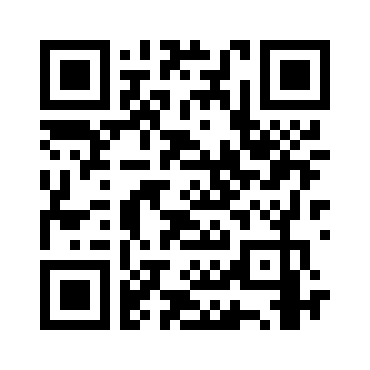

In [4]:
# Create WiFi QR code
qr_wifi = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)

qr_wifi.add_data(wifi_qr_data)
qr_wifi.make(fit=True)

img_wifi = qr_wifi.make_image(fill_color="black", back_color="white")
img_wifi.save("m5stack_wifi_qr.png")

print("✓ WiFi QR code saved as: m5stack_wifi_qr.png")
display(img_wifi)

## Generate Web URL QR Code

This QR code opens the web interface directly (after you're connected to WiFi).

✓ URL QR code saved as: m5stack_url_qr.png


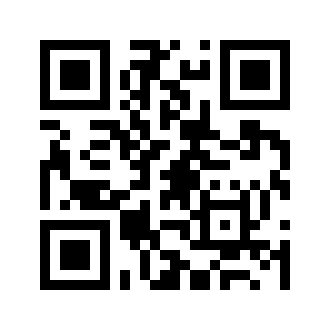

In [5]:
# Create URL QR code
qr_url = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)

qr_url.add_data(WEB_URL)
qr_url.make(fit=True)

img_url = qr_url.make_image(fill_color="black", back_color="white")
img_url.save("m5stack_url_qr.png")

print("✓ URL QR code saved as: m5stack_url_qr.png")
display(img_url)

## Create Combined Instruction Card

This creates a nice printable card with both QR codes and instructions.

✓ Setup card saved as: m5stack_setup_card.png


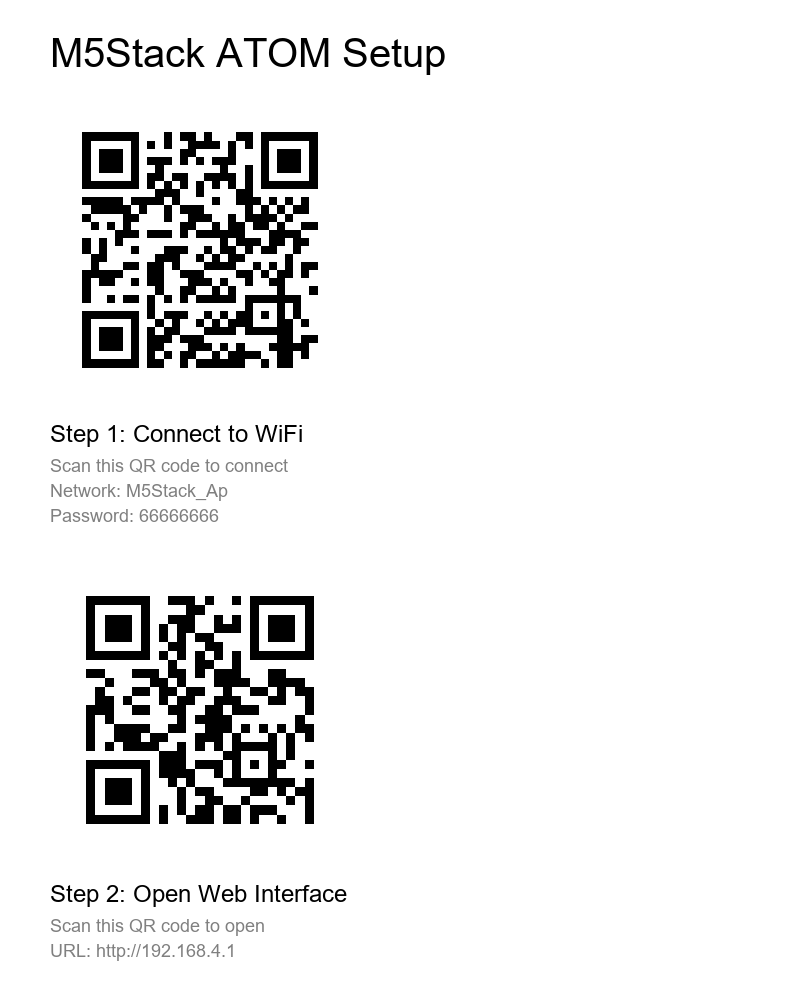

In [6]:
# Create a combined image with instructions
card_width = 800
card_height = 1000
card = Image.new('RGB', (card_width, card_height), 'white')
draw = ImageDraw.Draw(card)

# Try to use a nice font, fallback to default if not available
try:
    title_font = ImageFont.truetype("arial.ttf", 40)
    subtitle_font = ImageFont.truetype("arial.ttf", 24)
    text_font = ImageFont.truetype("arial.ttf", 18)
except:
    title_font = ImageFont.load_default()
    subtitle_font = ImageFont.load_default()
    text_font = ImageFont.load_default()

# Add title
draw.text((50, 30), "M5Stack ATOM Setup", fill="black", font=title_font)

# Add WiFi QR code
qr_wifi_small = img_wifi.resize((300, 300))
card.paste(qr_wifi_small, (50, 100))
draw.text((50, 420), "Step 1: Connect to WiFi", fill="black", font=subtitle_font)
draw.text((50, 455), "Scan this QR code to connect", fill="gray", font=text_font)
draw.text((50, 480), f"Network: {WIFI_SSID}", fill="gray", font=text_font)
draw.text((50, 505), f"Password: {WIFI_PASSWORD}", fill="gray", font=text_font)

# Add URL QR code
qr_url_small = img_url.resize((300, 300))
card.paste(qr_url_small, (50, 560))
draw.text((50, 880), "Step 2: Open Web Interface", fill="black", font=subtitle_font)
draw.text((50, 915), "Scan this QR code to open", fill="gray", font=text_font)
draw.text((50, 940), f"URL: {WEB_URL}", fill="gray", font=text_font)

# Save the card
card.save("m5stack_setup_card.png")
print("✓ Setup card saved as: m5stack_setup_card.png")
display(card)

## Usage Instructions

### For Android/iOS:
1. **Scan the WiFi QR code** (first one)
   - Your phone will prompt: "Connect to M5Stack_Ap?"
   - Tap "Connect"
   - Wait a few seconds for connection

2. **Scan the URL QR code** (second one)
   - Opens http://192.168.4.1 in your browser
   - You'll see the LED color picker interface

### Manual Connection:
If QR codes don't work:
1. Go to WiFi settings
2. Connect to: **M5Stack_Ap**
3. Password: **66666666**
4. Open browser and go to: **http://192.168.4.1**

### Files Generated:
- `m5stack_wifi_qr.png` - WiFi connection QR code
- `m5stack_url_qr.png` - Web interface QR code
- `m5stack_setup_card.png` - Combined instruction card (printable)

---

**Note:** The WiFi QR code format is supported by:
- ✅ Android 10+ (native camera app)
- ✅ iOS 11+ (native camera app)
- ✅ Most QR code scanner apps